## Oppgave 7: Luften skal med (10 poeng)

Vår antagelse at temperaturen i luften holdes konstant ved $200$ grader er ikke realistisk. I realiteten vil temperaturen i ovnen gå ned når et kaldere legeme settes inn i ovnen. 

Det vil også oppstå konveksjon, men dette er noe vi vil ignorere i denne oppgaven.

Vi tar et lag av luft rundt legemet med i modellen. I luftlaget så har vi fortsatt den partielle differensiallikningen
$$
\begin{align}\tag{20}
u_t = \alpha \cdot ( u_{xx} + u_{yy} ),
\end{align}
$$
hvor $\alpha$ tar en annen lavere verdi som passer bedre til luft.

På randen rundt luftlaget har vi fortsatt konstant temperatur $200$ for alle verdier av $t$.

I luftlaget så er temperaturen $200$ grader når $t=0$. Temperaturen til legemet vi setter inn ved $t=0$ er $15$ grader.

Bredden og høyden av luftlaget skal være omtrent halvparten av bredden og høyden til legemet. Dere kan selv bestemme de nøyaktige dimensjonene.

### a)

Sett opp problemet og kjør beregningene fra oppgave 6 på nytt. Det vil si, sett opp den partielle differensiallikningen med rand- og initialbetingelser. Løs deretter likningen numerisk.

Legg ved et *varmeplot* (altså fargeplot med rødt for varmt og blått for kaldt) for noen ulike tidspunkt.

### b)

Lag en animasjon som viser hvordan temperaturen til legemet endrer seg over tid.

Dere trenger ikke inkludere animasjonen i rapporten, men inkluder kildekode, og diskuter hva dere observerer.

### c)

Hvor lang tid tar det før temperaturen i midten av legemet når 60 grader? Tegn et varmeplot for tidspunktet dette skjer.




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy.linalg as la


xsize = 26  # cm
ysize = 26  # cm
objectsize = 10  # cm
m = 100  #antall punkter x
n = 100  #antall punkter y
dx = xsize / (m+1) 
dy = ysize / (n+1)
dt = 0.001  #tid/steg
steps = 40000 #antall steg
tid = dt*steps #total tid


obj = (slice(int((m-2)/4),int(n-(n-2)/4)),slice(int((m-2)/4),int(n-(n-2)/4)))

d_obj = 12.90 #MÅ VÆRE I CM^2/S
d_luft = 0.22 #MÅ VÆRE I CM^2/S


x = np.linspace(0, xsize, m+2)
y = np.linspace(0, ysize, n+2)

U0 = np.ones((m, n)) * 15 
U0[:, 0] = U0[:, -1] = 200
U0[0, :] = U0[-1, :] = 200

#deriverer for uxx og uyy, og setter inn i diffusjonslikningen,
def f(u, t):
    u_xx = (np.roll(u, -1, axis=0) - 2*u + np.roll(u, 1, axis=0)) / dx**2
    u_yy = (np.roll(u, -1, axis=1) - 2*u + np.roll(u, 1, axis=1)) / dy**2
    u = d_luft*(u_xx + u_yy)
    u[obj] = d_obj*(u_xx[obj] + u_yy[obj])
    return u

def euler(U, dt, steps):
    u = np.copy(U)
    for t in range(steps):
        u += dt * f(u, t)
        u[:, 0] = u[:, -1] = 200
        u[0, :] = u[-1, :] = 200
    return u

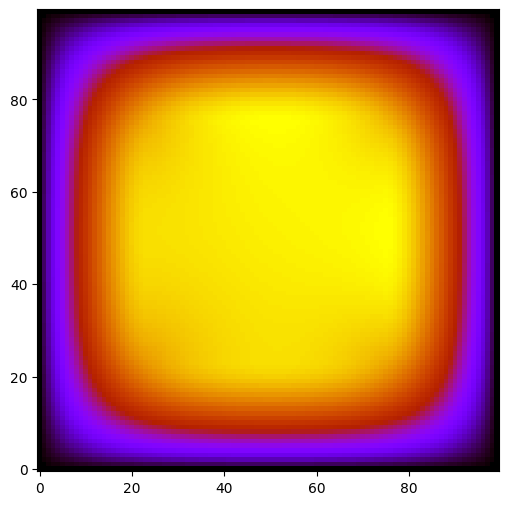

In [15]:
ims = []
fig = plt.figure(figsize=(6, 6))

for i in range(0, steps, 500): 
    u_step = euler(U0, dt, i)
    ax = fig.gca()
    im = ax.imshow(u_step, cmap='gnuplot_r', animated=True, origin='lower')
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
HTML(ani.to_jshtml())

In [16]:
#finne ut etter hvor mange tidssteg den er 60 grader? 
i = 0

u_step = euler(U0, dt, i)

while u_step[50,50] < 60.0:
    u_step = euler(U0, dt, i)
    i += 500

i = i-550

u_step = euler(U0, dt, i)

while u_step[50,50] < 60.0:
    u_step = euler(U0, dt, i)
    i += 1

i = i - 1

u_step = euler(U0, dt, i)

print(f"Midten av legemet treffer 60 grader etter {i} tidssteg, {i*dt:.3f} sekunder, og da er temperaturen {u_step[50,50]:.3f} grader.")

Midten av legemet treffer 60 grader etter 36949 tidssteg, 36.949 sekunder, og da er temperaturen 60.576 grader.
